# Esto es con OLS

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns

# Datos y limpieza de train.csv

In [2]:
train = pd.read_csv('../data/train.csv')
train.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2842228,20211205213126,2021-12-06,Your little appartment on wheels,A waggon luxurous designed as a hotel room on ...,"Waterland is a beautiful countryside area, wit...",https://a0.muscache.com/pictures/cc2aa51a-3c11...,3040748,https://www.airbnb.com/users/show/3040748,Henk,2012-07-24,"Amsterdam, North Holland, The Netherlands","Living in the countryside, just near Amsterdam...",within a few hours,100%,75%,f,https://a0.muscache.com/im/users/3040748/profi...,https://a0.muscache.com/im/users/3040748/profi...,NaN,13,13,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Noord-Oost,NaN,52.39508,4.99186,Private room in farm stay,Private room,3,NaN,1.5 shared baths,1.0,NaN,"[""First aid kit"", ""Free parking on premises"", ...",87.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,249,2021-12-06,81,0,0,2014-08-03,2019-06-15,4.62,4.56,4.29,4.57,4.75,4.69,4.49,0363 2A6D 7C09 877D 715F,f,10,0,10,0,0.91
1,1,https://www.airbnb.com/rooms/41236669,20211205213126,2021-12-06,Spacious 4p city center apartment (2 bedrooms!),Are you looking for a perfect place to stay in...,Our home is located in the Plantagebuurt. A un...,https://a0.muscache.com/pictures/5f33bf5a-399c...,34773624,https://www.airbnb.com/users/show/34773624,Julie,2015-06-01,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/a5da3...,https://a0.muscache.com/im/pictures/user/a5da3...,Weesperbuurt en Plantage,0,0,"['email', 'phone', 'reviews']",t,f,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,NaN,52.36371,4.90745,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Hot water kettle"", ""Pocket wifi"", ""Stove"", ""...",250.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,3,3,3,3,2021-12-06,9,4,1,2020-01-26,2021-09-05,5.00,5.00,5.00,4.89,5.00,5.00,4.89,0363 BD0E 9934 ACCA D3DE,f,1,1,0,0,0.40


In [3]:
#train.info()

In [4]:
#train.columns

In [5]:
elim = ['amenities', 'picture_url', 'neighbourhood_group_cleansed',
        'calendar_updated', 'listing_url', 'name', 'description', 'bathrooms', 'scrape_id',
        'neighborhood_overview', 'host_about','host_response_time']

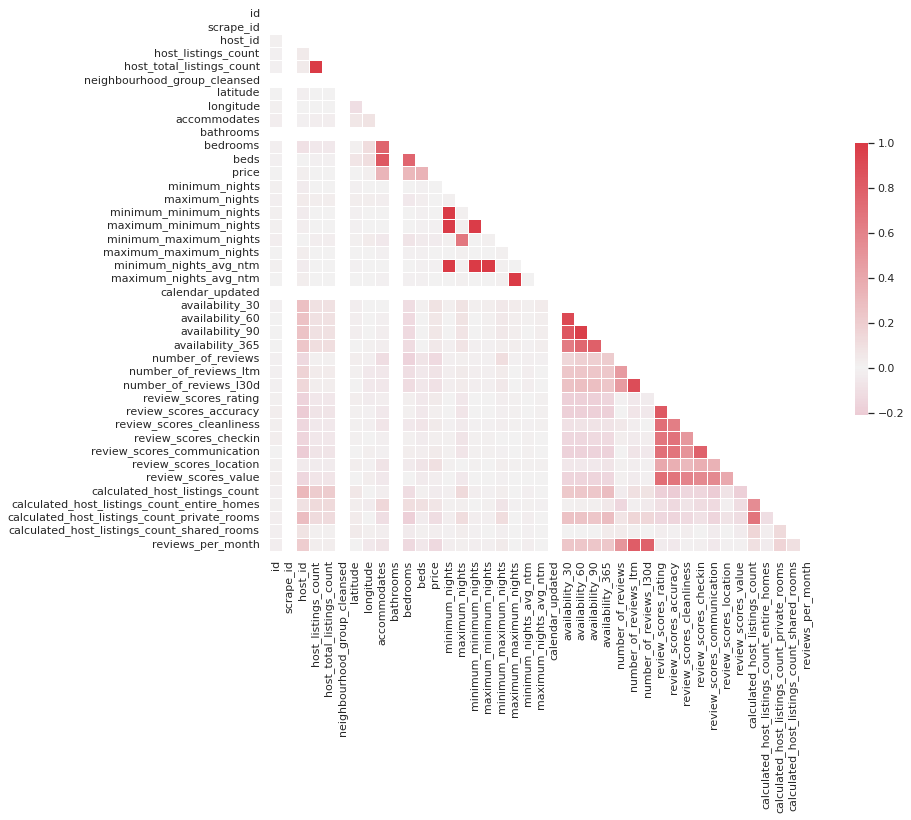

In [6]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [7]:
upper = train.corr().abs().where(np.triu(np.ones(train.corr().abs().shape), k=1).astype(np.bool))

In [8]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
elim += to_drop
elim

['amenities',
 'picture_url',
 'neighbourhood_group_cleansed',
 'calendar_updated',
 'listing_url',
 'name',
 'description',
 'bathrooms',
 'scrape_id',
 'neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_total_listings_count',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'availability_60',
 'availability_90',
 'minimum_nights',
 'maximum_nights']

In [9]:
train.drop(elim, axis=1, inplace=True)

In [10]:
train.head(2)

,id,last_scraped,host_id,host_url,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2021-12-06,3040748,https://www.airbnb.com/users/show/3040748,Henk,2012-07-24,"Amsterdam, North Holland, The Netherlands",100%,75%,f,https://a0.muscache.com/im/users/3040748/profi...,https://a0.muscache.com/im/users/3040748/profi...,NaN,13,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Noord-Oost,52.39508,4.99186,Private room in farm stay,Private room,3,1.5 shared baths,1.0,NaN,87.0,1125.0,1125.0,2.0,1125.0,t,0,249,2021-12-06,81,0,0,2014-08-03,2019-06-15,4.62,4.56,4.29,4.57,4.75,4.69,4.49,0363 2A6D 7C09 877D 715F,f,10,0,10,0,0.91
1,1,2021-12-06,34773624,https://www.airbnb.com/users/show/34773624,Julie,2015-06-01,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,f,https://a0.muscache.com/im/pictures/user/a5da3...,https://a0.muscache.com/im/pictures/user/a5da3...,Weesperbuurt en Plantage,0,"['email', 'phone', 'reviews']",t,f,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,52.36371,4.90745,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,250.0,1125.0,1125.0,2.0,1125.0,t,3,3,2021-12-06,9,4,1,2020-01-26,2021-09-05,5.00,5.00,5.00,4.89,5.00,5.00,4.89,0363 BD0E 9934 ACCA D3DE,f,1,1,0,0,0.40


In [11]:
cols = list(train.columns)
aux = []

for i in cols:
    if 'url' in i:
        aux.append(i)

train.drop(aux, axis=1, inplace=True)

In [12]:
train.head(2)

,id,last_scraped,host_id,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2021-12-06,3040748,Henk,2012-07-24,"Amsterdam, North Holland, The Netherlands",100%,75%,f,NaN,13,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Noord-Oost,52.39508,4.99186,Private room in farm stay,Private room,3,1.5 shared baths,1.0,NaN,87.0,1125.0,1125.0,2.0,1125.0,t,0,249,2021-12-06,81,0,0,2014-08-03,2019-06-15,4.62,4.56,4.29,4.57,4.75,4.69,4.49,0363 2A6D 7C09 877D 715F,f,10,0,10,0,0.91
1,1,2021-12-06,34773624,Julie,2015-06-01,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,f,Weesperbuurt en Plantage,0,"['email', 'phone', 'reviews']",t,f,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,52.36371,4.90745,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,250.0,1125.0,1125.0,2.0,1125.0,t,3,3,2021-12-06,9,4,1,2020-01-26,2021-09-05,5.00,5.00,5.00,4.89,5.00,5.00,4.89,0363 BD0E 9934 ACCA D3DE,f,1,1,0,0,0.40


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4167 non-null   int64  
 1   last_scraped                                  4167 non-null   object 
 2   host_id                                       4167 non-null   int64  
 3   host_name                                     4167 non-null   object 
 4   host_since                                    4167 non-null   object 
 5   host_location                                 4155 non-null   object 
 6   host_response_rate                            2754 non-null   object 
 7   host_acceptance_rate                          3075 non-null   object 
 8   host_is_superhost                             4167 non-null   object 
 9   host_neighbourhood                            2381 non-null   o

In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = train.select_dtypes(include=numerics)
len(newdf.columns)

30

In [40]:
train_num = train._get_numeric_data()
cols = list(train_num.columns)

for col in range(len(cols)):
    col1 = cols[col]
    mean = train_num[col1].mean()
    train_num[col1].fillna(mean, inplace=True)

In [41]:
import statsmodels.api as sm

X=train._get_numeric_data().drop('price', axis=1)
y=train._get_numeric_data().price

In [42]:
x=sm.add_constant(X)

In [43]:
modelo=sm.OLS(y, x).fit()

In [45]:
pred=modelo.predict(x)

#modelo.summary()
pred

0        58.278173
1       212.741819
2       249.680696
3       126.517249
4       135.125484
           ...    
4162    114.109808
4163     94.508737
4164    197.260088
4165    154.983731
4166    257.005926
Length: 4167, dtype: float64

In [52]:
sample = pd.read_csv('../data/sample.csv')
sample[:5]

,price,id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [55]:
sample.price = pred
sample[:5]

,price,id
0,58.278173,0
1,212.741819,1
2,249.680696,2
3,126.517249,3
4,135.125484,4


In [57]:
sample.to_csv('../data/cacota_gorda.csv', index=False)